### Libraries

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils.preprocessing import standardize, classic_preprocessing
from src.utils.get_data import import_data, expert_models
from src.utils.model_helpers import AUC_all_models

In [14]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load Data

In [5]:
DATA_PATH = '../../data'
coarse_data, coarse_labels = import_data(DATA_PATH, segmentation_type = 'coarse', drop_user_features=False)
fine_data, fine_labels = import_data(DATA_PATH, segmentation_type = 'fine', drop_user_features=False)
no_data, no_labels = import_data(DATA_PATH, segmentation_type = 'no', drop_user_features=False)

# For later processing rename the index
no_data.index = no_data.index.rename('subject')

In [21]:
coarse_labels.Label.mean()

0.26976744186046514

### Preprocessing

In [6]:
# rename
X_coarse = coarse_data
X_fine = fine_data
X_no = no_data

#### Normalisation

In [7]:
# For case where drop_user_features=False
X_coarse = standardize(X_coarse, 0, -5)
X_fine = standardize(X_fine, 0, -5)
X_no = standardize(X_no, 0, -5)

# Standardise the age
X_coarse = standardize(X_coarse, -4, -3)
X_fine = standardize(X_fine, -4, -3)
X_no = standardize(X_no, -4, -3)

#### Dummy code and correlated feature dropping

In [9]:
X_coarse = classic_preprocessing(X_coarse, norm=False)
X_fine = classic_preprocessing(X_fine, norm=False)
X_no = classic_preprocessing(X_no, norm=False)

#### Get optimal features model

In [7]:
#X_coarse_opt = get_optimal_features_model(X_fine, fine_labels, model=GradientBoostingClassifier(random_state=0), start_idx = 1)

### Model training for each expert with additional features

In [145]:
coarse_results_experts = expert_models(X_coarse, coarse_labels)
fine_results_experts = expert_models(X_fine, fine_labels)
no_results_experts = expert_models(X_no, no_labels)

In [146]:
coarse_results_experts['Data'] = 'coarse'
fine_results_experts['Data'] = 'fine'
no_results_experts['Data'] = 'no_segmentation'
display(coarse_results_experts, fine_results_experts, no_results_experts)

,Models,Exp_1_AUC,Exp_2_AUC,Exp_3_AUC,Data
0,LogisticRegression,0.637157,0.539389,0.656209,coarse
1,SVM,0.644801,0.526959,0.641057,coarse
2,LDA,0.657257,0.531174,0.642537,coarse
3,KNN,0.635085,0.529898,0.640847,coarse
4,GaussianNB,0.615633,0.509398,0.544291,coarse
5,DecisionTree,0.584950,0.525679,0.593299,coarse
6,RandomForest,0.656332,0.496570,0.660337,coarse
7,GradientBoosting,0.619253,0.532204,0.666541,coarse


,Models,Exp_1_AUC,Exp_2_AUC,Exp_3_AUC,Data
0,LogisticRegression,0.640347,0.555213,0.661229,fine
1,SVM,0.631595,0.551421,0.657826,fine
2,LDA,0.633300,0.555820,0.660011,fine
3,KNN,0.634405,0.609653,0.667124,fine
4,GaussianNB,0.634640,0.525760,0.592695,fine
5,DecisionTree,0.607212,0.533320,0.631005,fine
6,RandomForest,0.658725,0.557810,0.697429,fine
7,GradientBoosting,0.610539,0.534997,0.699068,fine


,Models,Exp_1_AUC,Exp_2_AUC,Exp_3_AUC,Data
0,LogisticRegression,0.624789,0.478895,0.601293,no_segmentation
1,SVM,0.651701,0.480037,0.602699,no_segmentation
2,LDA,0.644702,0.487214,0.602357,no_segmentation
3,KNN,0.559225,0.520973,0.578345,no_segmentation
4,GaussianNB,0.552034,0.566775,0.639811,no_segmentation
5,DecisionTree,0.515731,0.530172,0.562670,no_segmentation
6,RandomForest,0.601457,0.509614,0.634973,no_segmentation
7,GradientBoosting,0.585384,0.489799,0.614388,no_segmentation


### Model training all data

In [15]:
oversampling = True
coarse_results = AUC_all_models(X_coarse, coarse_labels.Label, k=6, oversampling=oversampling)
fine_results = AUC_all_models(X_fine, fine_labels.Label, k=6, oversampling=oversampling)
no_results = AUC_all_models(X_no, no_labels.Label, k=6, oversampling=oversampling)

/home/mogan/anaconda3/envs/ada/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mogan/anaconda3/envs/ada/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [34]:
coarse_results = coarse_results.rename(columns={'AUC (mean)': "Coarse_AUC"})
fine_results = fine_results.rename(columns={'AUC (mean)': "Fine_AUC"})
no_results = no_results.rename(columns={'AUC (mean)': "No_Seg_AUC"})

pd.concat([coarse_results, fine_results["Fine_AUC"], no_results["No_Seg_AUC"]], axis=1, sort=False)
# Most promising seem to be RandomForest and GradientBoosting --> Tune their hyperparameters!

,Models,Coarse_AUC,Fine_AUC,No_Seg_AUC
0,LogisticRegression,0.534213,0.533288,0.539380
1,SVM,0.500000,0.500761,0.500000
2,LDA,0.534146,0.535025,0.537539
3,KNN,0.526120,0.523591,0.510807
4,GaussianNB,0.498120,0.559975,0.563672
5,DecisionTree,0.555856,0.587821,0.517209
6,RandomForest,0.505505,0.510379,0.505578
7,GradientBoosting,0.549927,0.539885,0.515346


In [14]:
coarse_results = coarse_results.rename(columns={'AUC (mean)': "Coarse_AUC"})
fine_results = fine_results.rename(columns={'AUC (mean)': "Fine_AUC"})
no_results = no_results.rename(columns={'AUC (mean)': "No_Seg_AUC"})

pd.concat([coarse_results, fine_results["Fine_AUC"], no_results["No_Seg_AUC"]], axis=1, sort=False)
# Most promising seem to be RandomForest and GradientBoosting --> Tune their hyperparameters!

,Models,Coarse_AUC,Fine_AUC,No_Seg_AUC
0,LogisticRegression,0.582126,0.575572,0.588832
1,SVM,0.573342,0.577179,0.581497
2,LDA,0.580749,0.578730,0.596400
3,KNN,0.555671,0.602944,0.554159
4,GaussianNB,0.498425,0.562296,0.586074
5,DecisionTree,0.556305,0.540323,0.553375
6,RandomForest,0.592845,0.577431,0.602959
7,GradientBoosting,0.573105,0.567573,0.562576


### Models without expert features

In [136]:
DATA_PATH = '../../data'
coarse_data_n, coarse_labels_n = import_data(DATA_PATH, segmentation_type = 'coarse', is_user_features=False)
fine_data_n, fine_labels_n = import_data(DATA_PATH, segmentation_type = 'fine', is_user_features=False)
no_data_n, no_labels_n = import_data(DATA_PATH, segmentation_type = 'no', is_user_features=False)

# For later processing rename the index
no_data_n.index = no_data_n.index.rename('subject')

In [137]:
# rename
X_coarse_n = coarse_data_n
X_fine_n = fine_data_n
X_no_n = no_data_n

#### Preprocessing

In [140]:
# For case where is_user_features=False
X_coarse_n = preprocessing(X_coarse_n, 0, -1)
X_fine_n = preprocessing(X_fine_n, 0, -1)
X_no_n = preprocessing(X_no_n, 0, -1)

### Train model for each expert without additional features

In [147]:
coarse_results_experts_n = expert_models(X_coarse_n, coarse_labels_n)
fine_results_experts_n = expert_models(X_fine_n, fine_labels_n)
no_results_experts_n = expert_models(X_no_n, no_labels_n)

In [149]:
coarse_results_experts_n['Data'] = 'coarse'
fine_results_experts_n['Data'] = 'fine'
no_results_experts_n['Data'] = 'no_segmentation'
display(coarse_results_experts_n, fine_results_experts_n, no_results_experts_n)

,Models,Exp_1_AUC,Exp_2_AUC,Exp_3_AUC,Data
0,LogisticRegression,0.654778,0.568860,0.638187,coarse
1,SVM,0.667090,0.555536,0.635450,coarse
2,LDA,0.674634,0.566695,0.627700,coarse
3,KNN,0.629359,0.537272,0.645450,coarse
4,GaussianNB,0.620304,0.504691,0.547275,coarse
5,DecisionTree,0.589397,0.530860,0.590049,coarse
6,RandomForest,0.656887,0.518623,0.656826,coarse
7,GradientBoosting,0.608157,0.523568,0.656220,coarse


,Models,Exp_1_AUC,Exp_2_AUC,Exp_3_AUC,Data
0,LogisticRegression,0.651857,0.576043,0.650634,fine
1,SVM,0.656575,0.575327,0.655019,fine
2,LDA,0.665062,0.576502,0.651679,fine
3,KNN,0.633579,0.598581,0.666519,fine
4,GaussianNB,0.623828,0.541054,0.590206,fine
5,DecisionTree,0.573791,0.507718,0.566471,fine
6,RandomForest,0.648308,0.545030,0.658535,fine
7,GradientBoosting,0.569641,0.528840,0.663622,fine


,Models,Exp_1_AUC,Exp_2_AUC,Exp_3_AUC,Data
0,LogisticRegression,0.661438,0.509811,0.597696,no_segmentation
1,SVM,0.631391,0.514491,0.598442,no_segmentation
2,LDA,0.647578,0.507826,0.586907,no_segmentation
3,KNN,0.570736,0.516984,0.564617,no_segmentation
4,GaussianNB,0.560218,0.576621,0.652570,no_segmentation
5,DecisionTree,0.529014,0.531616,0.588228,no_segmentation
6,RandomForest,0.614096,0.538977,0.607519,no_segmentation
7,GradientBoosting,0.592311,0.497984,0.584409,no_segmentation


In [150]:
# Compare: with expert features:
display(coarse_results_experts, fine_results_experts, no_results_experts)

,Models,Exp_1_AUC,Exp_2_AUC,Exp_3_AUC,Data
0,LogisticRegression,0.637157,0.539389,0.656209,coarse
1,SVM,0.644801,0.526959,0.641057,coarse
2,LDA,0.657257,0.531174,0.642537,coarse
3,KNN,0.635085,0.529898,0.640847,coarse
4,GaussianNB,0.615633,0.509398,0.544291,coarse
5,DecisionTree,0.584950,0.525679,0.593299,coarse
6,RandomForest,0.656332,0.496570,0.660337,coarse
7,GradientBoosting,0.619253,0.532204,0.666541,coarse


,Models,Exp_1_AUC,Exp_2_AUC,Exp_3_AUC,Data
0,LogisticRegression,0.640347,0.555213,0.661229,fine
1,SVM,0.631595,0.551421,0.657826,fine
2,LDA,0.633300,0.555820,0.660011,fine
3,KNN,0.634405,0.609653,0.667124,fine
4,GaussianNB,0.634640,0.525760,0.592695,fine
5,DecisionTree,0.607212,0.533320,0.631005,fine
6,RandomForest,0.658725,0.557810,0.697429,fine
7,GradientBoosting,0.610539,0.534997,0.699068,fine


,Models,Exp_1_AUC,Exp_2_AUC,Exp_3_AUC,Data
0,LogisticRegression,0.624789,0.478895,0.601293,no_segmentation
1,SVM,0.651701,0.480037,0.602699,no_segmentation
2,LDA,0.644702,0.487214,0.602357,no_segmentation
3,KNN,0.559225,0.520973,0.578345,no_segmentation
4,GaussianNB,0.552034,0.566775,0.639811,no_segmentation
5,DecisionTree,0.515731,0.530172,0.562670,no_segmentation
6,RandomForest,0.601457,0.509614,0.634973,no_segmentation
7,GradientBoosting,0.585384,0.489799,0.614388,no_segmentation


### Train model for all data without additional features

In [151]:
oversampling = True
coarse_results_n = AUC_all_models(X_coarse_n, coarse_labels_n.Label, k=6, oversampling=oversampling)
fine_results_n = AUC_all_models(X_fine_n, fine_labels_n.Label, k=6, oversampling=oversampling)
no_results_n = AUC_all_models(X_no_n, no_labels_n.Label, k=6, oversampling=oversampling)

In [152]:
coarse_results_n = coarse_results_n.rename(columns={'AUC (mean)': "Coarse_AUC"})
fine_results_n = fine_results_n.rename(columns={'AUC (mean)': "Fine_AUC"})
no_results_n = no_results_n.rename(columns={'AUC (mean)': "No_Seg_AUC"})

pd.concat([coarse_results_n, fine_results_n["Fine_AUC"], no_results_n["No_Seg_AUC"]], axis=1, sort=False)

,Models,Coarse_AUC,Fine_AUC,No_Seg_AUC
0,LogisticRegression,0.665278,0.668373,0.652621
1,SVM,0.660725,0.669927,0.640732
2,LDA,0.665490,0.668754,0.656511
3,KNN,0.566628,0.602520,0.574999
4,GaussianNB,0.499666,0.574214,0.614173
5,DecisionTree,0.614619,0.621450,0.568382
6,RandomForest,0.674398,0.661090,0.663244
7,GradientBoosting,0.671097,0.671115,0.648956


## Compare the results from hyperparameter tuning

In [57]:
no_seg_no_md = pd.read_pickle("results_no_seg_no_metadata.pkl")
no_seg_md = pd.read_pickle("results_no_seg_metadata.pkl")

coarse_no_md = pd.read_pickle("results_coarse_no_metadata.pkl")
coarse_md = pd.read_pickle("results_coarse_metadata.pkl")

fine_no_md = pd.read_pickle("results_fine_no_metadata.pkl")
fine_md = pd.read_pickle("results_fine_metadata.pkl")


In [58]:
#no_seg_no_md.merge(no_seg_md, left_on = 'models', right_on = 'models')
no_seg_no_md = pd.melt(no_seg_no_md, id_vars=['models'], value_vars=['auc_expert_weighted'])
#no_seg_md = pd.melt(no_seg_md, id_vars=['models'], value_vars=['auc_best', 'auc_expert_weighted'])

#coarse_no_md = pd.melt(coarse_no_md, id_vars=['models'], value_vars=['auc_best', 'auc_expert_weighted'])
coarse_md = pd.melt(coarse_md, id_vars=['models'], value_vars=['auc_expert_weighted'])

#fine_no_md = pd.melt(fine_no_md, id_vars=['models'], value_vars=['auc_best', 'auc_expert_weighted'])
fine_md = pd.melt(fine_md, id_vars=['models'], value_vars=[ 'auc_expert_weighted'])

In [59]:
no_seg_no_md['variable'] = no_seg_no_md['variable'].map({'auc_expert_weighted': 'no'})
coarse_md['variable'] = coarse_md['variable'].map({'auc_expert_weighted': 'coarse'})
fine_md['variable'] = fine_md['variable'].map({'auc_expert_weighted': 'fine'})

In [70]:
fine_md

,models,variable,value
0,logistic,fine,0.616548
1,lda,fine,0.614492
2,knn,fine,0.728246
3,svc,fine,0.639872
4,naive_bayes,fine,0.580620
5,decision_tree,fine,0.602585
6,random_forest,fine,0.611828
7,gradient_boosting,fine,0.637227


In [132]:
df = fine_md.append(coarse_md).append(no_seg_no_md)

In [133]:
df

,models,variable,value
0,logistic,fine,0.616548
1,lda,fine,0.614492
2,knn,fine,0.728246
3,svc,fine,0.639872
4,naive_bayes,fine,0.580620
5,decision_tree,fine,0.602585
6,random_forest,fine,0.611828
7,gradient_boosting,fine,0.637227
0,logistic,coarse,0.610238
1,lda,coarse,0.610872


In [134]:
df['models'] = df['models'].map({'logistic':'Logistic', 'lda':'LDA', 'knn':'KNN', 'svc':'SVC',
                 'naive_bayes':'Naive Bayes', 'decision_tree':'Decision Tree', 'random_forest':'Random Forest', 
                  'gradient_boosting':'eXtreme GB'})

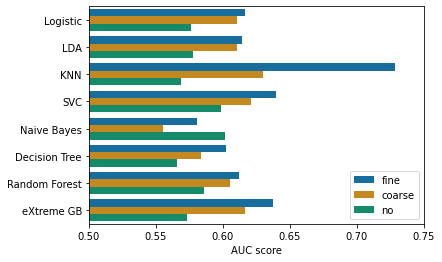

In [135]:
plt.figure(figsize=(6,4))
sns.barplot(data = df, y = 'models', x = 'value', hue = 'variable', palette='colorblind')
plt.xlabel('AUC score')
#plt.xticks(rotation=90);
plt.legend(loc='lower right')
plt.xlim(0.5,0.75);
plt.ylabel('')
plt.savefig('results.png',bbox_inches='tight')

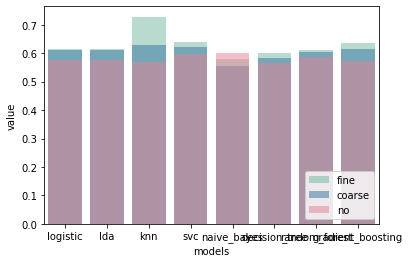

In [66]:
sns.barplot(data = fine_md, x = 'models', y = 'value', hue = 'variable', palette='Set2', alpha = 0.5)
sns.barplot(data = coarse_md, x = 'models', y = 'value', hue = 'variable', alpha = 0.5)
sns.barplot(data = no_seg_no_md, x = 'models', y = 'value', hue = 'variable', palette = 'husl', alpha = 0.5)


In [ ]:
# ich will für alle drei datensätze den expert model score